# Minh - Analysis

Load data

In [1]:
import pandas as pd
import numpy as np
import re
from tqdm.auto import tqdm

origin_df = pd.read_csv('data/stage_10.csv', low_memory=False)
origin_df = origin_df.fillna('')
origin_df = origin_df.astype('str')


In [2]:
df = origin_df.copy()

In [3]:
def process_price_cell(x):
    '''
    Convert price string to float
    '''
    price_pattern = r'\d+\.\d+|\d+,\d+|\d+'
    
    found = re.search(price_pattern, x)
    
    if found:
        price = found.group().replace(',', '.')
        
        return float(price)
    return np.nan


In [4]:
df_price = df.price.apply(process_price_cell)


In [5]:
prices = df_price.to_numpy()
print(f"Prices: {len(prices)}")
prices = prices[~np.isnan(prices)]
print(f"Non null prices: {len(prices)}")

Prices: 195161
Non null prices: 195097


In [6]:
prices = prices[prices < 1000]

294947
280902


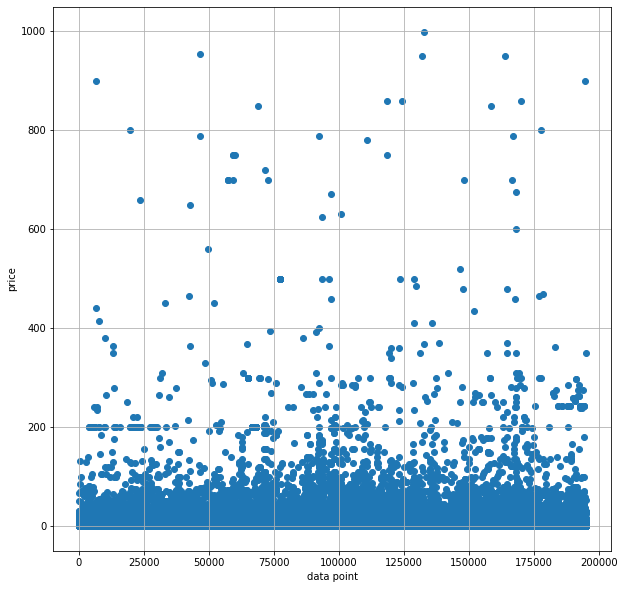

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(range(prices.shape[0]), prices)
ax.grid(True)
ax.set_ylabel('price')
ax.set_xlabel('data point')

plt.show()

In [8]:
len(prices[prices <= 25]) / prices.shape[0]

0.9630385301535874

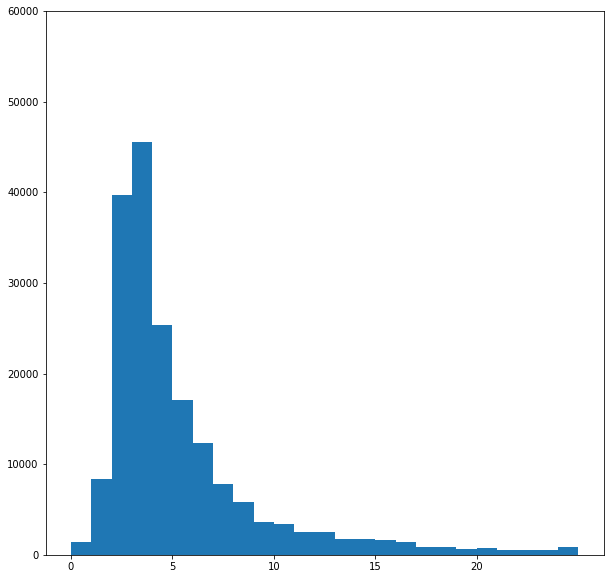

In [9]:
# HISTOGRAM PLOT
# only show prices lower or equal 25
# as they cover around 98% of the dataset.

x = prices[prices <= 25]

n_points = x.shape[0]
n_bins = 25

fig, axs = plt.subplots(figsize=(10, 10))


axs.hist(x, bins=n_bins)

plt.xticks(np.arange(0, 25, 5))
plt.yticks(np.arange(0, 70000, 10000))
plt.show()

In [10]:
# check distribution
from scipy.stats import skew, kurtosis

print('SUMMARY ABOUT PRICE: ')
print('Mean: ', np.mean(prices))
print('Median: ', np.median(prices))
print('Std: ', np.std(prices))
print('Var: ', np.var(prices))


# sk = np.sum(np.power((prices - np.mean(prices)), 3)) / (prices.shape[0] * np.power(np.std(prices), 3))
sk = skew(prices)
print('Skewness: ', sk)

ku = kurtosis(prices)
print('Kurtosis: ', ku)

# max_threshold = np.mean(prices) + 2 * np.std(prices)
# print('Max_threshold: ', max_threshold)
# print('Min_threshold: ', max(0, np.mean(prices) - 2 * np.std(prices)))
# print(len(prices[prices < max_threshold]) / prices.shape[0])


SUMMARY ABOUT PRICE: 
Mean:  7.446724819052417
Median:  4.0
Std:  18.94395700800906
Var:  358.87350712129563
Skewness:  20.508386522689204
Kurtosis:  669.6118706997512


Price is continuous numeric variable.

We can see that the distribution is positive skewed ($s_k > 0$).

We can see that the most frequent price range is from 2 to 5 billions vnd. 